# Data Cleaning

In this notebook we will import and clean the dataset before exporting it as a new csv file. Fistly we will convert all column names into lower letters and replace spaces with `_`. Next, in order to deal with missing data, we will either impute based on other available information or by dropping the missing data altogether.

## Problem Statement

In the past, Chicago has been hit by an outbreak of the West Nile Virus. The Data Science team at the Disease and Treatment Agency has been tasked by the Centers for Disease Control (CDC) to develop a strategy to deploy the effective use of targeted spraying to prevent future outbreaks.

Based on avilable data on features such as weather, location, mosquito species etc, we will build a binary classification model that predicts the presence of the West Nile Virus in the city of Chicago. The model that achieves the highest ROC AUC score on the validation set, will be selected as our production model. The model is also expected to outperform the baseline ROC AUC score of 0.5.

A cost-benefit analysis will also be done to determine if the benefits of spraying outweighs its costs.

In [1]:
import pandas as pd
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
# Do not display future warnings
import warnings
warnings.simplefilter(action='ignore')


df = pd.read_csv("./asset/weather.csv")
print("weather shape",df.shape)
df_row_original = df.shape[0]
train = pd.read_csv("./asset/train.csv")
print("train shape",train.shape)

weather shape (2944, 22)
train shape (10506, 12)


## Cleaning Train dataset 

The train dataset consist of several distinct features, although a quick examination shows that several features are same location-based information. The dataset also contains the target, which is `WnvPresent`.

In [2]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64


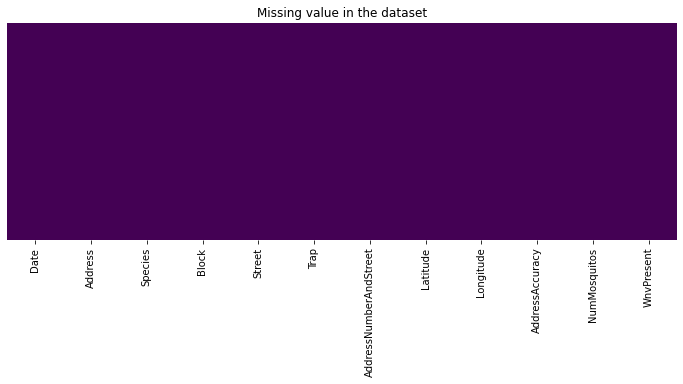

In [4]:
# Let's look at the null values in a heatmap to get an overview

plt.figure(figsize=(12,4))
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

print(train.isnull().sum())

### Clean column titles to lower case

In [5]:
def clean_column(df):
    df.columns = df.columns.str.replace(' ' , '_')
    df.columns = df.columns.str.lower()
    
    return df

In [6]:
clean_column(train)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [7]:
train.shape

(10506, 12)

### Clean NumMosquitos

An observation has been made here that for each line item, no `nummosquitos` exceeded 50. Upon closer inspection, it was observed that for numbers that exceed the value of 50, a new line is duplicated from the prior where the next addition of `nummosquitos` is added for a value that is not exceeding 50.

Therefore, we will sum the total number of mosquitos for the given date and location and remove duplicate entries.

In [8]:
#return index of duplicated and mosquito number != 50
series = train.duplicated().loc[train.nummosquitos != 50]

indices = list()
for index, value in zip(series.index, series):
    if value == True:
        indices.append(index)

In [9]:
train = train.drop(indices)

In [10]:
train= train.groupby([col for col in train.columns if col not in ['nummosquitos', \
                                                                'wnvpresent']]).sum()
train.reset_index(inplace=True)
train['wnvpresent'] = train['wnvpresent'].map(lambda x : 1 if x > 0 else x)

train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [11]:
train.shape

(8475, 12)

### Check on species column

In [12]:
# check 7 Species of Mosquitoes
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    3826
CULEX RESTUANS            2393
CULEX PIPIENS             1950
CULEX TERRITANS            216
CULEX SALINARIUS            83
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

### Check on trap column

In [13]:
train['trap'].value_counts()

T900     154
T135     147
T002     147
T115     143
T151     143
        ... 
T078       6
T094B      5
T076       5
T237       3
T040       2
Name: trap, Length: 136, dtype: int64

### Set date as index



In [14]:
# Set index to be the date column as a DatetimeIndex.
train.set_index(pd.to_datetime(train['date']), inplace=True)

# Drop the date column from our data.
train.drop(columns='date', inplace=True)

# Confirm.
train.head()

,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
date,,,,,,,,,,,
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [15]:
train.to_csv("./asset/train_cleaned.csv")

## Cleaning Weather dataset

The weather dataset consists of many numerical data that relates to weather data for a given day. The data is obtained from 2 stations within the city. Many of the data are based on temperature such as `Tmax`, `Tavg`, `WetBulb`, etc.

In [16]:
# function to check for missing values (since in this dataset they are denoted by "M" instead of null values)
def missing_check():
    missing = []
    missingno = []
    for col in df.columns:
        if df[col].loc[df[col]=="M"].any() == False:
            missing.append("Not Missing")
            missingno.append(0)
        else:
            missing.append("Missing")
            missingno.append(df[col].loc[df[col]=="M"].count())
    columns = df.columns.to_list()
    df2 = pd.DataFrame(zip(missing,missingno), index=columns, columns=["Missing Check","Missing Count"])
    return df2.loc[df2["Missing Check"]=="Missing"]

# function to drop null values "M"
def droprow(col):
    missing_ = df[col].loc[df[col]=="M"].index.to_list()
    df.drop(index=missing_,inplace=True)
    df.reset_index(drop=True,inplace=True)

In [17]:
# convert all column headings to lower case and replace spaces with '_'
clean_column(df)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


In [18]:
missing_check()

,Missing Check,Missing Count
tavg,Missing,11
depart,Missing,1472
wetbulb,Missing,4
heat,Missing,11
cool,Missing,11
depth,Missing,1472
water1,Missing,2944
snowfall,Missing,1472
preciptotal,Missing,2
stnpressure,Missing,4


In [19]:
for i in df.columns.to_list():
    print(i)
    print(df[i].value_counts())
    print("\n")

station
1    1472
2    1472
Name: station, dtype: int64


date
2009-08-27    2
2013-06-08    2
2007-05-14    2
2008-08-25    2
2009-10-24    2
             ..
2007-07-25    2
2007-08-06    2
2008-07-26    2
2013-06-16    2
2008-05-15    2
Name: date, Length: 1472, dtype: int64


tmax
84     128
79     121
82     118
81     117
83     109
      ... 
102      2
103      2
104      1
41       1
42       1
Name: tmax, Length: 63, dtype: int64


tmin
63    121
65    111
60    109
61    106
62    105
66    103
68    103
57    103
64    101
59    100
56     98
69     95
71     95
58     94
70     90
67     89
54     81
49     78
52     74
50     72
55     71
53     71
47     69
44     59
46     58
43     58
51     57
48     55
45     55
72     50
42     46
73     46
41     38
40     33
39     29
74     29
75     28
38     22
37     21
36     20
77     20
34     12
35     11
33     10
79      9
31      7
32      7
29      6
76      6
78      4
80      3
81      3
82      2
83      1
Name: tmin

In [20]:
# water1 has 100% missing values out of 2,944. Therefore we will remove the row

df.drop(columns=['water1'],inplace=True)

In [21]:
# Other columns should sufficiently describe the weather codes; therefore we can drop rather than splitting and encoding it

df.drop(columns=['codesum'],inplace=True)

In [22]:
# Since there are several low counts of missing values in various columns, we will drop them all
# and observe if a significant number of data points are lost

droprow("wetbulb")
droprow("heat")
droprow("preciptotal")
droprow("stnpressure")
droprow("sealevel")
droprow("avgspeed")

#check for how much data is lost
df.shape[0]/df_row_original

0.9911684782608695

since 99% of the data is retained after dropping, it is acceptable.

In [23]:
#Tavg missing values = average of Tmax & Tmin

Tavg_missing = df["tavg"].loc[df["tavg"]=="M"].index.to_list()

In [24]:
# impute averaged Tmax & Tmin as Tavg
for i in Tavg_missing:
    df["tavg"].iloc[i] = int(round((df["tmax"].iloc[i]+df["tmin"].iloc[i])/2))

In [25]:
#Depart missing values to match with Station 1 values

depart_missing = df.depart.loc[df.depart=="M"].index.to_list()

In [26]:
for i in depart_missing:
    df.depart.iloc[i]=df.depart.iloc[i-1]

In [27]:
# Since depth is either 0 or missing, we will drop the whole column.

df.drop(columns=['depth'],inplace=True)

In [28]:
# Snowfall values to match with Station 1 values

snow_missing = df.snowfall.loc[df.snowfall=="M"].index.to_list()
for i in snow_missing:
    df.snowfall.iloc[i]=df.snowfall.iloc[i-1]
    
# Furthermore we will replace trace amounts of snow as 0
df.snowfall = df.snowfall.replace(regex=r'\s*T\s*',value=0)

In [29]:
# we will replace trace amounts of precipitation as 0

df.preciptotal = df.preciptotal.replace(regex=r'\s*T\s*',value=0)

In [30]:
missing_check()

,Missing Check,Missing Count


No more of missing values labelled "M"

In [31]:
# Sunrise values to match with Station 1 values

sunrise_missing = df.sunrise.loc[df.sunrise=="-"].index.to_list()

for i in sunrise_missing:
    df.sunrise.iloc[i]=df.sunrise.iloc[i-1]


In [32]:
# Sunset values to match with Station 1 values

sunset_missing = df.sunset.loc[df.sunset=="-"].index.to_list()

for i in sunset_missing:
    df.sunset.iloc[i]=df.sunset.iloc[i-1]

In [33]:
df.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
snowfall        object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

In [34]:
# convert to appropriate data types
df["tavg"] = df["tavg"].astype(dtype='int64')
df["depart"] = df["depart"].astype(dtype='int64')
df["wetbulb"] = df["wetbulb"].astype(dtype='int64')
df["heat"] = df["heat"].astype(dtype='int64')
df["cool"] = df["cool"].astype(dtype='int64')
df["resultdir"] = df["resultdir"].astype(dtype='int64')

df['snowfall']= df['snowfall'].astype(dtype='float')
df['preciptotal']=df['preciptotal'].astype(dtype='float')
df['stnpressure']=df['stnpressure'].astype(dtype='float')
df['sealevel']=df['sealevel'].astype(dtype='float')
df['avgspeed']=df['avgspeed'].astype(dtype='float')

In [35]:
df.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg             int64
depart           int64
dewpoint         int64
wetbulb          int64
heat             int64
cool             int64
sunrise         object
sunset          object
snowfall       float64
preciptotal    float64
stnpressure    float64
sealevel       float64
resultspeed    float64
resultdir        int64
avgspeed       float64
dtype: object

In [36]:
# Set index to be the date column as a DatetimeIndex.
df.set_index(pd.to_datetime(df['date']), inplace=True)

# Drop the date column from our data.
df.drop(columns='date', inplace=True)

df.head()

,station,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
date,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67,14,51,56,0,2,0448,1849,0.0,0.0,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68,14,51,57,0,3,0448,1849,0.0,0.0,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51,-3,42,47,14,0,0447,1850,0.0,0.0,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52,-3,42,47,13,0,0447,1850,0.0,0.0,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56,2,40,48,9,0,0446,1851,0.0,0.0,29.39,30.12,11.7,7,11.9


In [37]:
# Export

df.to_csv("./asset/weather_cleaned.csv")